In [ ]:
from google.colab import files
files.upload()


Saving assignment1.csv to assignment1.csv


{'assignment1.csv': b'Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity, Unit Cost , Unit Price , Cost , Revenue ,Profit\r\n2-19-16,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80,109,80,109,29\r\n2-20-16,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.5,28.5,49,57,8\r\n2-27-16,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5,11,15,4\r\n03-12-2016,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.5,116.5,175,233,58\r\n03-12-2016,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35,41.67,105,125,20\r\n04-08-2016,2016,April,29,F,United States,Washington,Accessories,Tires and Tubes,1,66,78,66,78,12\r\n4-17-16,2016,April,29,F,United States,Washington,Accessories,Tires and Tubes,2,52,60,104,120,16\r\n4-17-16,2016,April,29,F,United States,Washington,Accessories,Tires and Tubes,1,60,68,60,68,8\r\n6-22-16,2016,June,29,F,Unite

In [ ]:
import pandas as pd

# Assuming your data is in a CSV file named 'data.csv'
data = pd.read_csv('assignment1.csv')

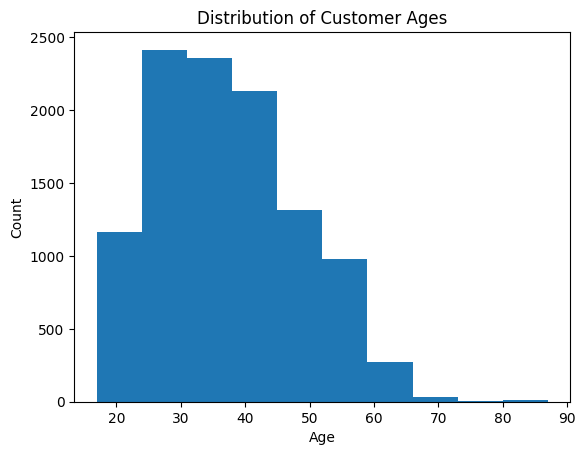

In [ ]:
# Drop any rows with missing values
data = data.dropna()

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Visualize the distribution of customer ages
import matplotlib.pyplot as plt

plt.hist(data['Customer Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Prepare the features and target variables
X = data[['Customer Age', 'Customer Gender', 'Country', 'State']]
y = data['Product Category']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("Logistic Regression - Accuracy:", logreg_accuracy, "F1 score:", logreg_f1)
print("Random Forest - Accuracy:", rf_accuracy, "F1 score:", rf_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.6313817330210773 F1 score: 0.4887181028495045
Random Forest - Accuracy: 0.6552693208430913 F1 score: 0.6177442602164063


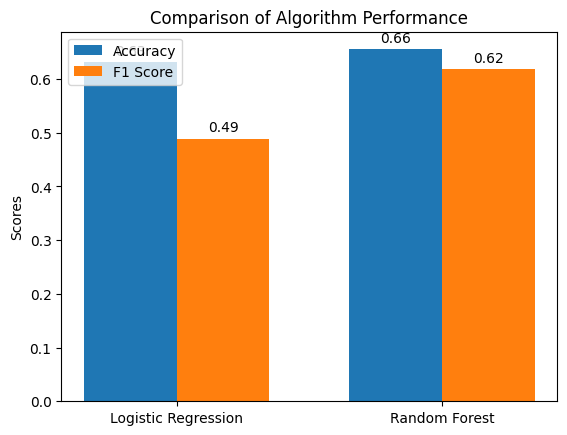

In [ ]:
import matplotlib.pyplot as plt

# Create lists to store accuracy and F1 scores
accuracy_scores = [logreg_accuracy, rf_accuracy]
f1_scores = [logreg_f1, rf_f1]
algorithms = ['Logistic Regression', 'Random Forest']

# Plot the bar chart
x = range(len(algorithms))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar([i + width for i in x], f1_scores, width, label='F1 Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Comparison of Algorithm Performance')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(algorithms)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
